In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy.ndimage import gaussian_filter

# Create empty image
nx, ny = 512, 512
image = np.zeros((ny, nx))

# Set number of stars
n = 10000

# Generate random positions
r = np.random.random(n) * nx
theta = np.random.uniform(0., 2. * np.pi, n)

# Generate random fluxes
f = np.random.random(n) ** 2

# Compute position
x = nx / 2 + r * np.cos(theta)
y = ny / 2 + r * np.sin(theta)

# Add stars to image
# ==> First for loop and if statement <==
for i in range(n):
    if x[i] >= 0 and x[i] < nx and y[i] >= 0 and y[i] < ny:
        image[int(y[i]), int(x[i])] += f[i]


# Convolve with a gaussian
image = gaussian_filter(image, 1)

# Add noise
image += np.random.normal(3., 0.01, image.shape)

# Write out to FITS image
fits.writeto('cluster.fits', image, overwrite=True)

In [2]:
# Make external packages available
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

# Read table.
# ==> dat[column_name] and dat[row_number] both valid <==
data_url = 'https://raw.githubusercontent.com/python4astronomers/python4astronomers/stable/examples/tables/fermi_agn.dat'
dat = ascii.read(data_url)

redshift = dat['redshift']    # array of values from 'redshift' column
flux = dat['photon_flux']
gamma = dat['spectral_index']

# Select rows that have a measured redshift
with_z = (redshift != -999)

plt.figure(1)
plt.semilogx(flux, gamma, '.b', label='All')  # First plot!
plt.semilogx(flux[with_z], gamma[with_z], 'or', label='With Z')
plt.legend(numpoints=1)
plt.grid()
plt.xlabel('Flux (photon/cm$^2$/s)')   # latex works
plt.ylabel('Spectral index $\Gamma$')
plt.show()



# Select low- and high-z samples
lowz = with_z & (redshift < 0.8)
highz = with_z & (redshift >= 0.8)

plt.figure(2)
bins = np.arange(1.2, 3.0, 0.1)    # values from 1.2 to 3.0 by 0.1
plt.hist(gamma[lowz], bins, color='b', alpha=0.5, label='z < 0.8')
plt.hist(gamma[highz], bins, color='r', alpha=0.5, label='z > 0.8')
plt.xlabel('Spectral index $\Gamma$')
plt.title('$\Gamma$ for low-z and high-z samples')
plt.legend(loc='upper left')
plt.show()
ascii.write(dat[with_z], 'fermi_agn_with_z.dat')

 [Failed]


OSError: [Errno 22] Invalid argument: 'https://raw.githubusercontent.com/python4astronomers/python4astronomers/stable/examples/tables/fermi_agn.dat'

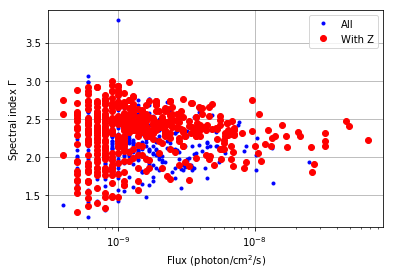

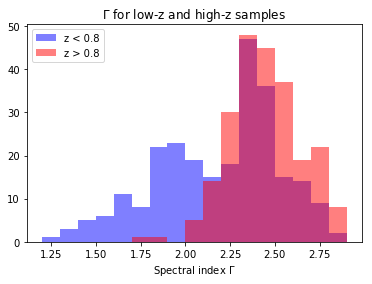

In [3]:
# Make external packages available
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

# Read table.
# ==> dat[column_name] and dat[row_number] both valid <==
data_url = 'https://raw.githubusercontent.com/python4astronomers/python4astronomers/stable/examples/tables/fermi_agn.dat'
dat = ascii.read(data_url)

redshift = dat['redshift']    # array of values from 'redshift' column
flux = dat['photon_flux']
gamma = dat['spectral_index']

# Select rows that have a measured redshift
with_z = (redshift != -999)

plt.figure(1)
plt.semilogx(flux, gamma, '.b', label='All')  # First plot!
plt.semilogx(flux[with_z], gamma[with_z], 'or', label='With Z')
plt.legend(numpoints=1)
plt.grid()
plt.xlabel('Flux (photon/cm$^2$/s)')   # latex works
plt.ylabel('Spectral index $\Gamma$')
plt.show()



# Select low- and high-z samples
lowz = with_z & (redshift < 0.8)
highz = with_z & (redshift >= 0.8)

plt.figure(2)
bins = np.arange(1.2, 3.0, 0.1)    # values from 1.2 to 3.0 by 0.1
plt.hist(gamma[lowz], bins, color='b', alpha=0.5, label='z < 0.8')
plt.hist(gamma[highz], bins, color='r', alpha=0.5, label='z > 0.8')
plt.xlabel('Spectral index $\Gamma$')
plt.title('$\Gamma$ for low-z and high-z samples')
plt.legend(loc='upper left')
plt.show()
ascii.write(dat[with_z], 'fermi_agn_with_z.dat')

Scale =  12.210 +/- 0.680
Offset = 3.019 +/- 0.088
Sigma =  -1.628 +/- 0.123


C:\Users\chaowang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


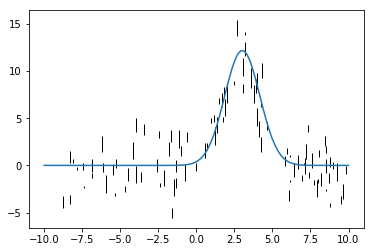

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Create a function
# ==> First encounter with *whitespace* in Python <==
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

# Generate fake data.
# Note: functions in random package, array arithmetic (exp)
n = 100
x = np.random.uniform(-10., 10., n)
y = np.exp(-(x - 3.)**2 / 4) * 10. + np.random.normal(0., 2., n)
e = np.random.uniform(0.1, 1., n)
# Note: these error bars don't reflect the distribution from which
# they were drawn! Chi^2 of the fit will be poor.

# Fit
popt, pcov = curve_fit(gaussian, x, y, sigma=e)

# Print results
print("Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0])))
print("Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1])))
print("Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2])))

# Plot data
plt.errorbar(x, y, yerr=e, linewidth=1, color='black', fmt=None)

# Plot model
xm = np.linspace(-10., 10., 100)  # 100 evenly spaced points
plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))

# Save figure
plt.savefig('fit.png')

plt.show()

Question 1 No ,I have 4 number of galaxy classes, my partner have 6 number galaxy classes, he classify the spiral galaxies into 4 classes.
Question 2
We both have elliptical galaxies, spiral galaxies, spiral galaxie with a bar  and irregular galaxies.
The different is he distinct the spiral galaxies into four classes.
Question 3
I redo the classification, but I insist my idea
Question 4 bluer galaxies is located at smaller u-g and g-r ;redder is in bigger
Question 5   the early (elliptical) galaxies is located at bigger u-g and g-r(above); the late (spiral) galaxies is lower.
Question 6   they are all elliptical. Not at all.
Question 7   some are blue (u-r: 1.4~1.7);some are red (u-r : 2.0~2.4)
Question 8  blue galaxies is always spiral galaxies, while  red galaxies is always elliptical galaxies.
Question 9  strong emission line(H,N,O) and absorption line(Mg, K, Na , Ca)
Question 10  blue galaxies is always spiral galaxies with strong emission line(H,N,O), while  red galaxies is always elliptical galaxies with more absorption line(Mg, K, Na , Ca).




